# **EDA, Visualization and Hypothesis Testing on Loan Dataset**

## Introduction

Exploratory data analysis is a crucial step to gain information about the dataset and makes the development of any machine learning algorithm easier. This notebook aims to document the process of EDA on Loan Dataset and perform data visualization tasks using Python libraries.

The key highlights of this project involves:
1. Overview
2. Column Transformation
3. Visualization
4. Missing Value Imputation
5. Correlation Matrix
6. Handling Categorical Data
7. Binning and Binarization
8. Outlier Detection and Removal
9. Business Decision Making: Visualization
10. Hypothesis Testing

Please refer to the 'Table of contents' in our Google Colab notebook.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import necessary libraries and data load

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Load the dataset

In [3]:
dataframe = pd.read_csv('/content/drive/MyDrive/Datasets/Transfer/loan_data_train.csv')

In [4]:
df = dataframe.copy()

In [5]:
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [6]:
df.shape

(2200, 15)

# **1.0** Overview

### **1.1** Identify categorical and numerical variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

### **1.2** Observation

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_col_list = categorical_cols.to_list()
print(categorical_col_list)
print(len(categorical_col_list))

['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State', 'Home.Ownership', 'FICO.Range', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Employment.Length']
12


There are total 12 Categorical Variables.

In [9]:
numerical_col = df.select_dtypes(include=['float64','int64']).columns
numerical_col_list = numerical_col.to_list()
print(numerical_col_list)
print(len(numerical_col_list))

['ID', 'Monthly.Income', 'Inquiries.in.the.Last.6.Months']
3


Currently there are 3 Numerical Variables.

### **Note:**

* Although if we observe closely, we can see few discrepancies in the list obtained and the actua dataset.

* **Problem:** 6 out of 12 (50%) columns are contains numeric values in the dataset but got assigned object datatype.

* **Probable root cause:** Improper datatype assignment during the data preparation process.

* For example, columns such as: Amount.Requested, Amount.Funded.By.Investors, Interest.Rate, Debt.To.Income.Ratio, Open.CREDIT.Lines, Revolving.CREDIT.Balance

# **2.0** Column Transformation

### **2.1** Convert categorical columns to numerical columns

In [10]:
categorical_to_numerical_col_list = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance']

for col in categorical_to_numerical_col_list:
  for i, val in df[col].items():
    if val == ".":
      print(f"Found '.' in column {col} at {i}")
      break

for col in categorical_to_numerical_col_list:
  df[col] = df[col].replace('.',pd.NA)

Found '.' in column Amount.Requested at 371
Found '.' in column Amount.Funded.By.Investors at 110
Found '.' in column Open.CREDIT.Lines at 98
Found '.' in column Revolving.CREDIT.Balance at 1374


In [11]:
df[categorical_to_numerical_col_list] = df[categorical_to_numerical_col_list].apply(pd.to_numeric)

### **2.1** Remove percentage (%) from the percentage_cols values and convert to numerical column

In [12]:
percentage_cols = ['Interest.Rate','Debt.To.Income.Ratio']

In [13]:
for col in percentage_cols:
  df[col] = df[col].str.strip('%')

In [14]:
df[percentage_cols] = df[percentage_cols].apply(pd.to_numeric)

In [15]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_col_list = categorical_cols.to_list()
print(categorical_col_list)
print(len(categorical_col_list))

['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'FICO.Range', 'Employment.Length']
6


Total 6 Catergorical variables after preprocessing

In [16]:
numerical_col = df.select_dtypes(include=['float64','int64']).columns
numerical_col_list = numerical_col.to_list()
print(numerical_col_list)
print(len(numerical_col_list))

['ID', 'Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate', 'Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']
9


Total 9 Numerical variables after preprocessing

**Note:**

*   The data discrepancies we observed in 1.0 Overview section are now resolved
*   Currently, we have total 6 Categorical columns and 9 Numerical columns

# **3.0** Visualization

### **3.1** Generate bar chart for all the categorical variables against their counts

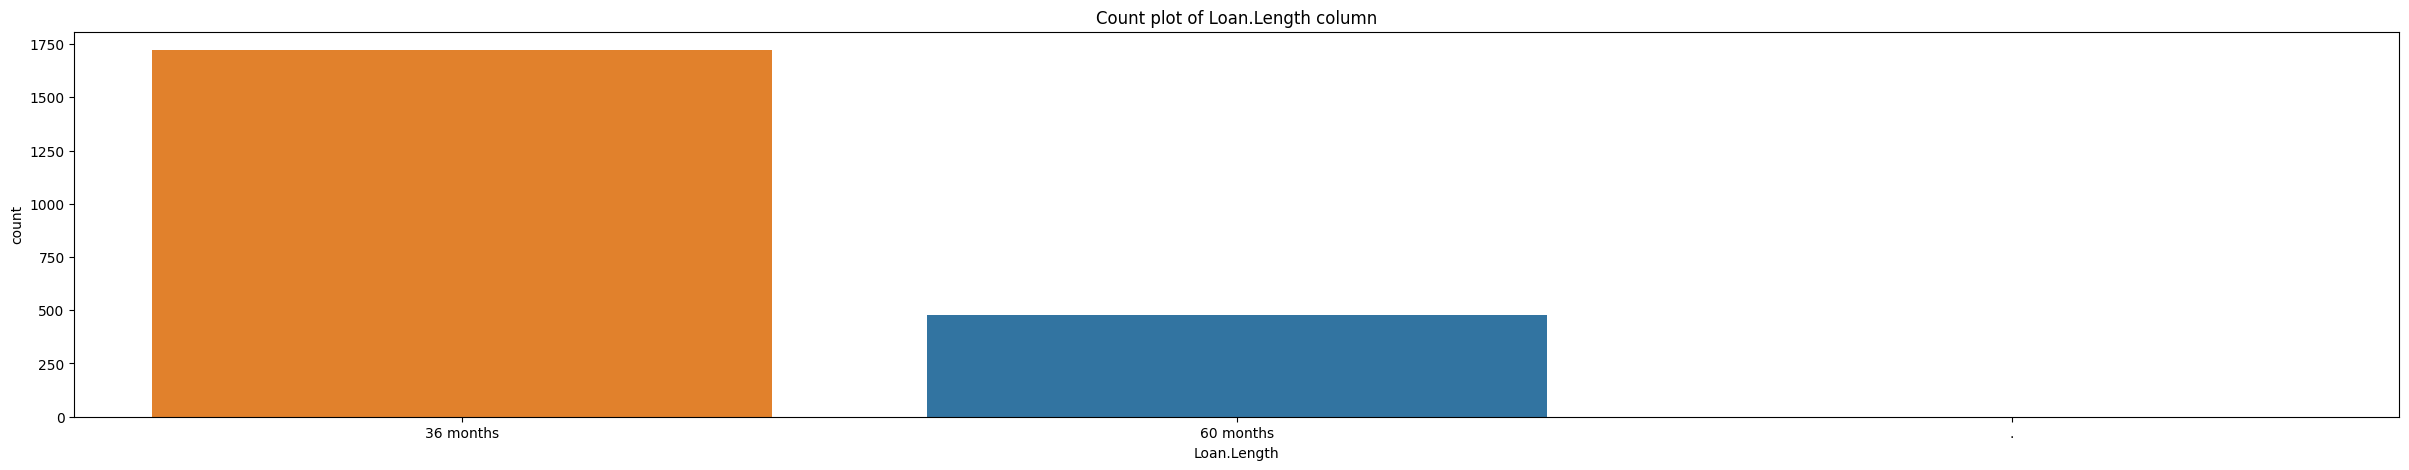

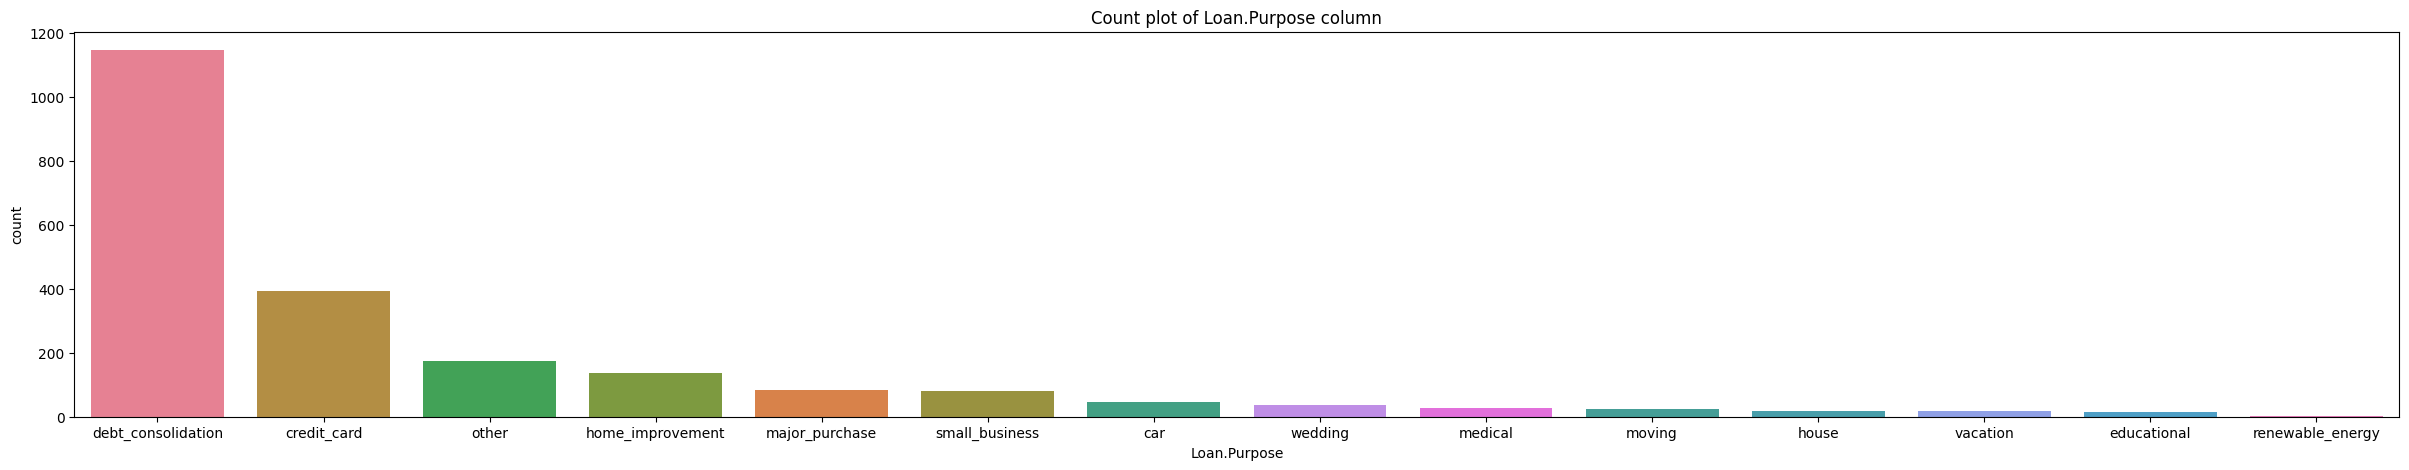

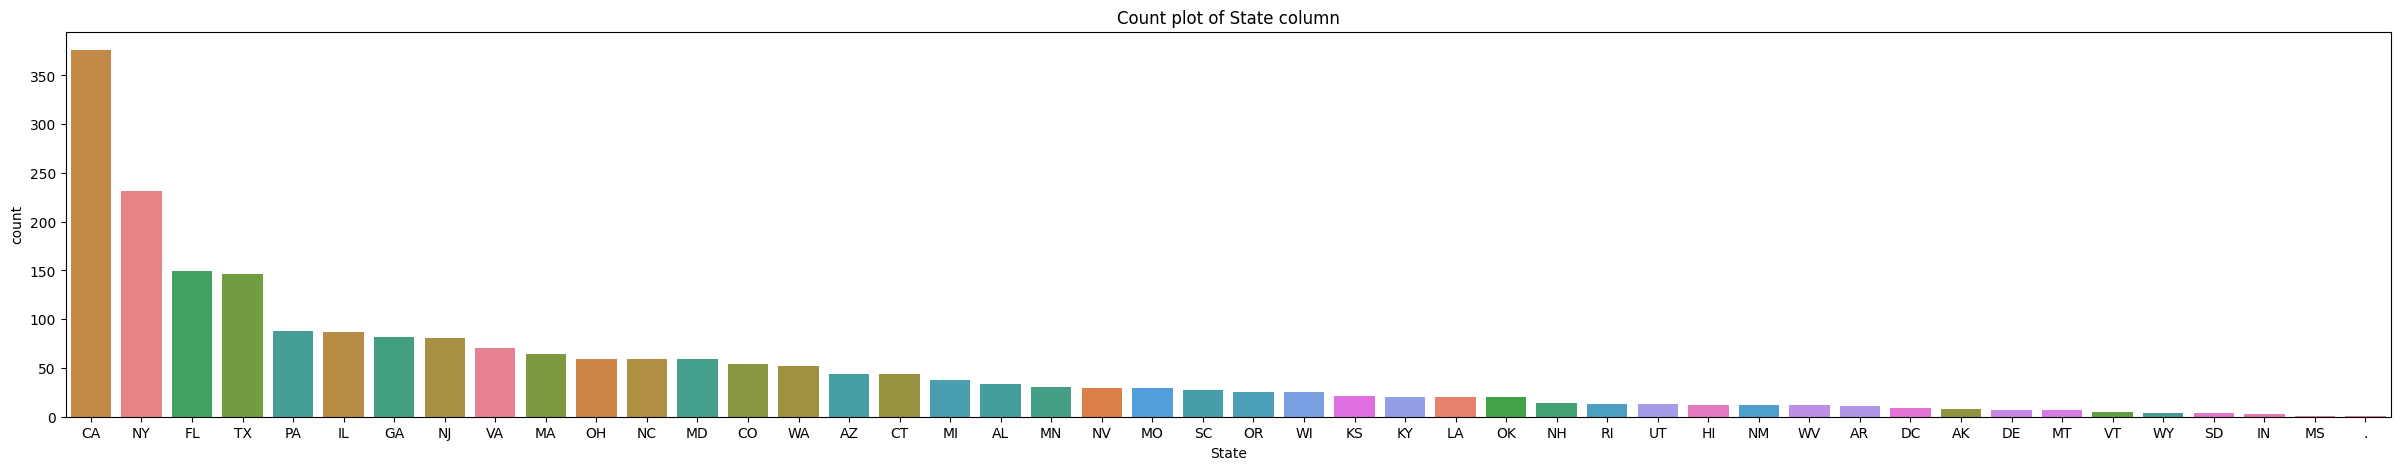

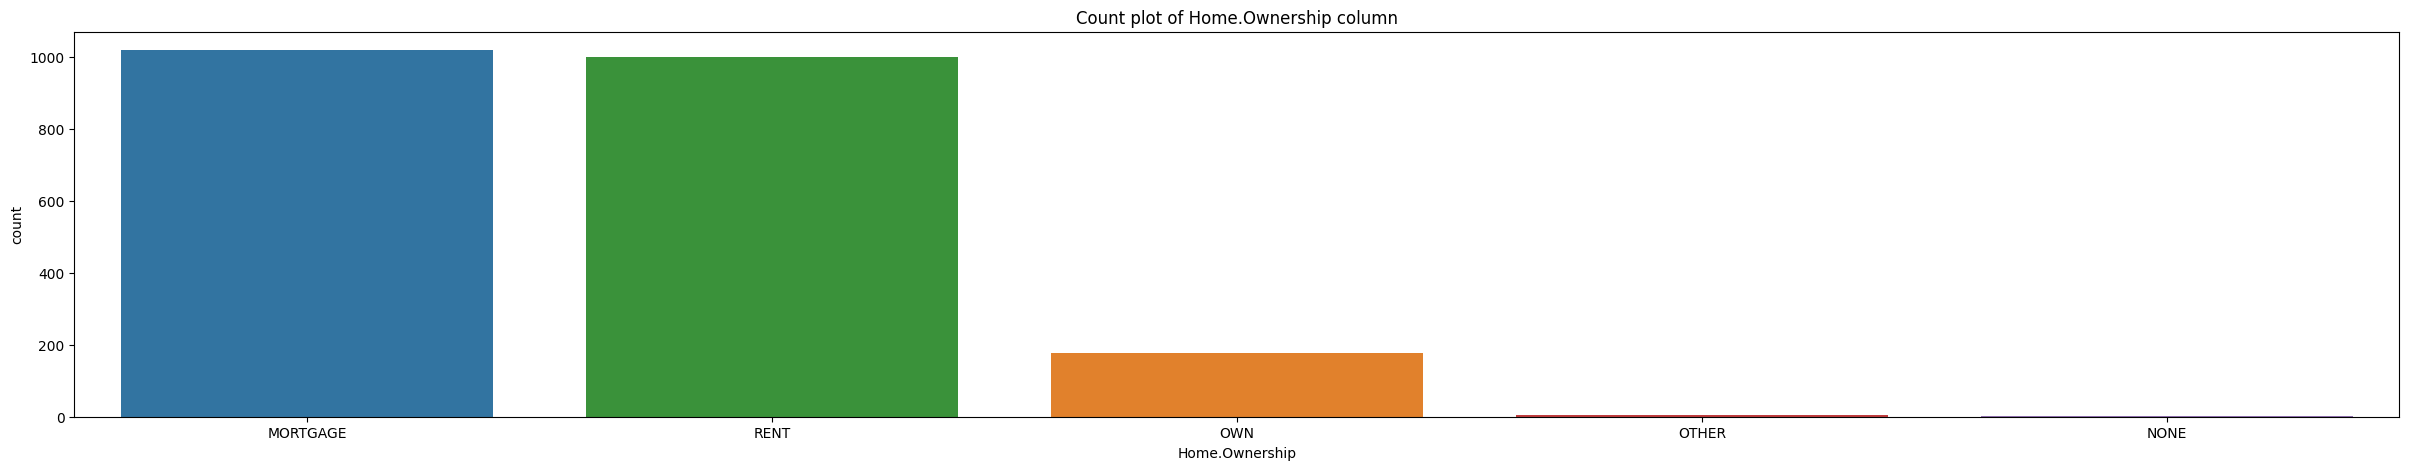

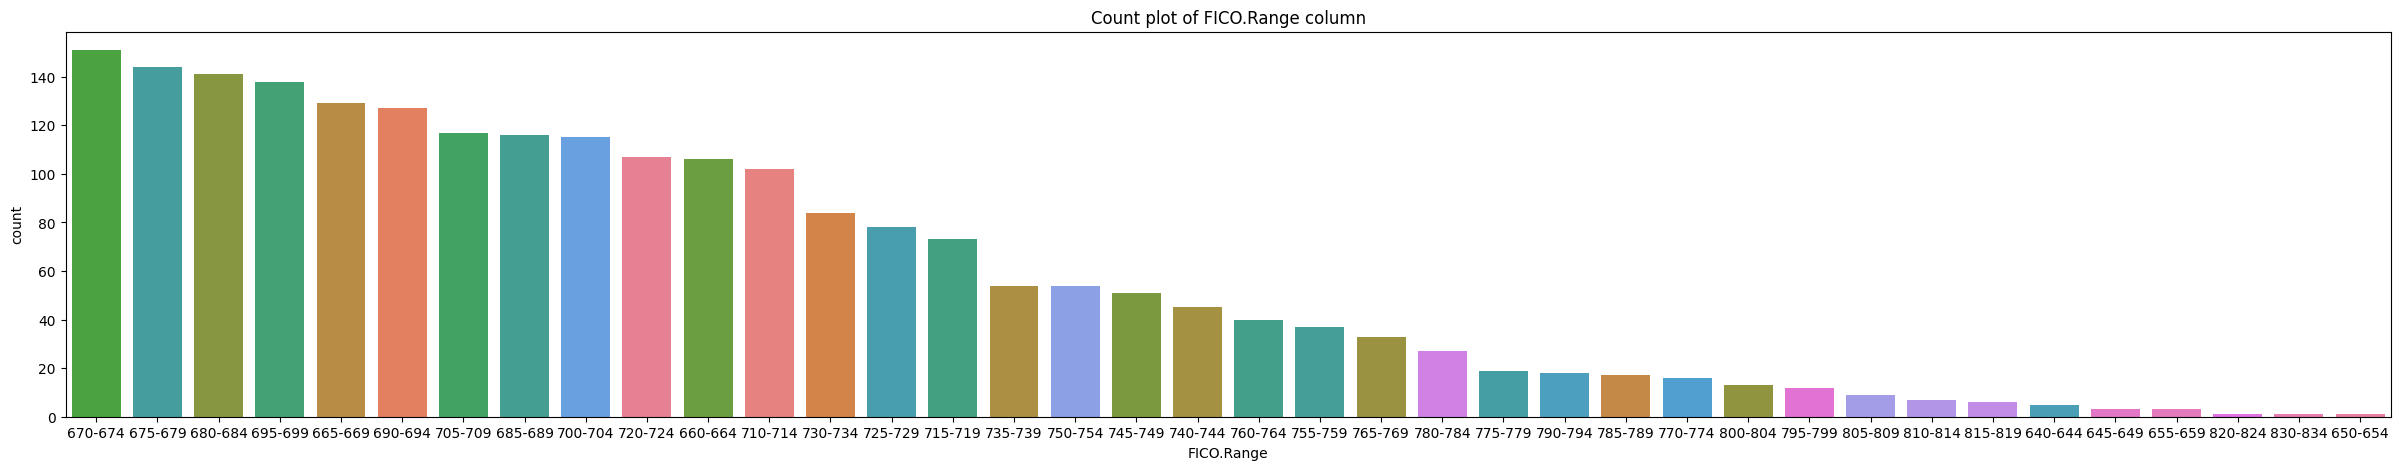

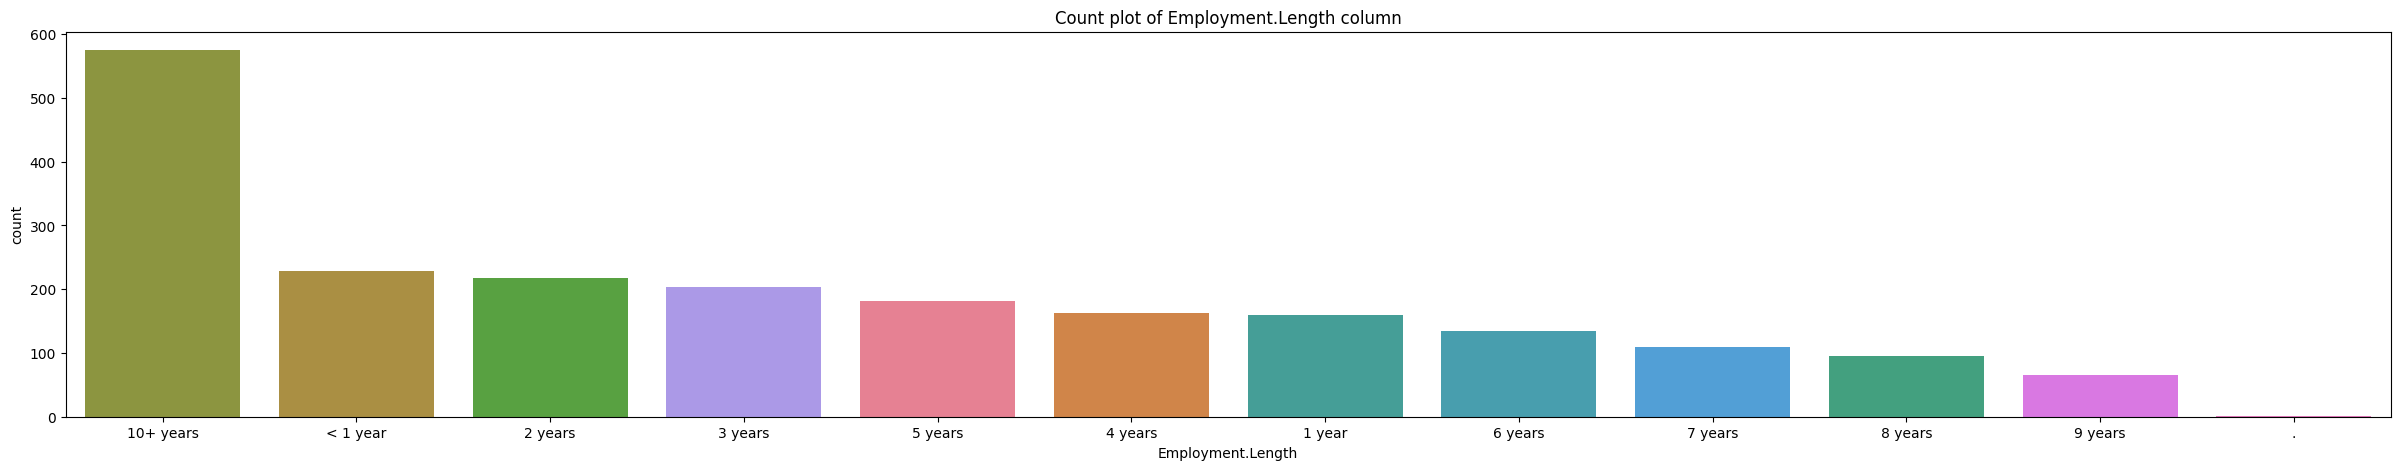

In [17]:
categorical_col_list = ['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'FICO.Range', 'Employment.Length']

for col in categorical_col_list:
  plt.figure(figsize=(30,5))
  sns.countplot(data=df, x=col, hue=col, order=df[col].value_counts().index, legend=False)
  plt.title(f'Count plot of {col} column')
  plt.show()

### **3.2** Observation

* Majority of the customers opted for 36 months loan duration over 60 months
* The most common underlying reason an applicant seeks a loan is for debt consolidation
* California (CA), New York (NY), and Florida (FL) are the top three states for loan applications
* Mortgage and rent ownership are nearly equal among loan applicants (46% and 45%), with a small pe* rcentage of home owners (8%)
* The majority of applicants have FICO scores in the 670-674 range
* Most applicants have over 10 years of employment, with a significant group having less than one year


# **4.0** Missing Value Imputation

### **4.1** Identify missing variables: Categorical variables

*   We have indentified an unintended value in each column is a dot (.)
*   Replaced the dot (.) with pandas NaN value
*   Used the fillna() method to fill these NaN values with a specified method
*   backward-fill missing values that propagates next valid observation backward to last)

### **4.2** Impute missing values: Backward fill imputation

In [18]:
categorical_col_list = ['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'FICO.Range', 'Employment.Length']

for col in categorical_col_list:
  df[col] = df[col].replace('.',pd.NA)

df[categorical_col_list].fillna(method='bfill',inplace=True)

### **4.3** Identify missing variables: Numerical variables

In [19]:
df[numerical_col_list].isnull().sum()

,0
ID,1
Amount.Requested,5
Amount.Funded.By.Investors,4
Interest.Rate,0
Debt.To.Income.Ratio,1
Monthly.Income,3
Open.CREDIT.Lines,7
Revolving.CREDIT.Balance,5
Inquiries.in.the.Last.6.Months,3


### **4.4** Impute missing variables: Random sample imputation

In [20]:
def impute_nan(df,var):
  random_sample = df[var].dropna().sample(df[var].isnull().sum(),random_state=0)
  random_sample.index = df[df[var].isnull()].index

  df.loc[df[var].isnull(), var] = random_sample

In [21]:
for col in numerical_col_list:
  impute_nan(df, col)

### **4.5** Observation

Recheck the missing value columns and we have handled the missing value with Random Sample Imputation with less Variance distortion

In [22]:
df[numerical_col_list].isnull().sum()

,0
ID,0
Amount.Requested,0
Amount.Funded.By.Investors,0
Interest.Rate,0
Debt.To.Income.Ratio,0
Monthly.Income,0
Open.CREDIT.Lines,0
Revolving.CREDIT.Balance,0
Inquiries.in.the.Last.6.Months,0


# **5.0** Correlation Matrix

### **5.1** Plot correlation matrix between all numerical columns

<Axes: >

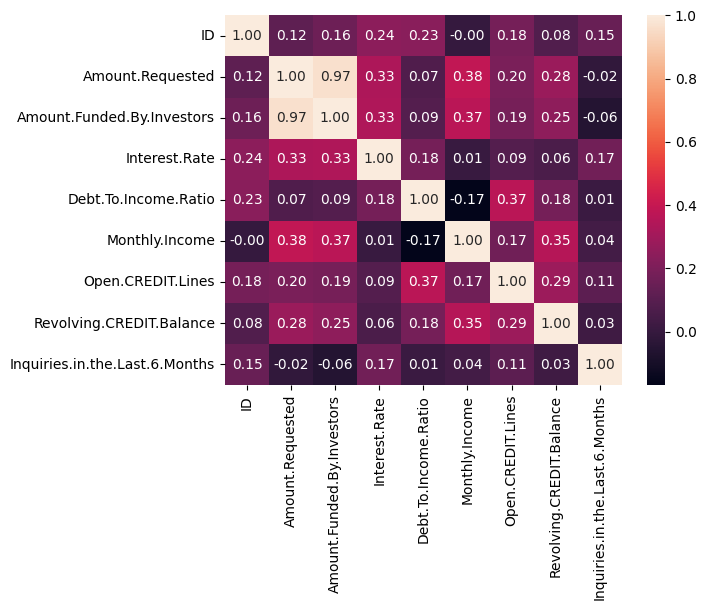

In [23]:
corr_matrix = df[numerical_col_list].corr()

sns.heatmap(data=corr_matrix, annot=True, fmt='.2f')

### **5.2** Observation

Write smthng

# **6.0** Handling Categorical Data

### **6.1** One hot encoding (OHE)

In [24]:
categorical_col_list = ['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'FICO.Range', 'Employment.Length']

for col in categorical_col_list:
  print(df[col].nunique())

2
14
45
5
38
11


**Observation:** From the above analysis we can conclude that the the State and FICO.Range categorical columns contain close to 40 distinct values. As of now, we will skip these columns and perform **"K-1 One Hot Encoding (OHE)" on Loan.Length and Home.Ownership** columns and **"One Hot Encoding (OHE) based on most frequent variables" method on Loan.Purpose and Employment.Length** columns for numerical representation

In [25]:
k1_ohe_list = ['Loan.Length',  'Home.Ownership']
most_freq_ohe_list = ['Loan.Purpose', 'Employment.Length']

In [26]:
df[k1_ohe_list].isnull().sum()

,0
Loan.Length,2
Home.Ownership,1


In [27]:
def impute_nan_categorical_col(df,var):
  df[var] = df[var].fillna(df[var].mode()[0])

In [28]:
for col in k1_ohe_list:
  impute_nan_categorical_col(df, col)

In [29]:
df[k1_ohe_list].isnull().sum()

,0
Loan.Length,0
Home.Ownership,0


In [30]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

df_ohe = ohe.fit_transform(df[k1_ohe_list])
df_ohe

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [31]:
ohe_cols = ohe.get_feature_names_out(k1_ohe_list)
df_ohe_converted = pd.DataFrame(df_ohe, index=df.index, columns=ohe_cols)

In [32]:
df_ohe_converted

,Loan.Length_36 months,Loan.Length_60 months,Home.Ownership_MORTGAGE,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2195,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2196,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2197,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2198,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [33]:
df_trf = pd.concat([df.drop(k1_ohe_list, axis=1),df_ohe_converted],axis=1)
df_trf

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,Loan.Length_36 months,Loan.Length_60 months,Home.Ownership_MORTGAGE,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,79542.0,25000.0,25000.00,18.49,debt_consolidation,27.56,VA,8606.56,720-724,11.0,15210.0,3.0,5 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,75473.0,19750.0,19750.00,17.27,debt_consolidation,13.39,NY,6737.50,710-714,14.0,19070.0,3.0,4 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,67265.0,2100.0,2100.00,14.33,major_purchase,3.50,LA,1000.00,690-694,13.0,893.0,1.0,< 1 year,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,80167.0,28000.0,28000.00,16.29,credit_card,19.62,NV,7083.33,710-714,12.0,38194.0,1.0,10+ years,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,17240.0,24250.0,17431.82,12.23,credit_card,23.79,OH,5833.33,730-734,6.0,31061.0,2.0,10+ years,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000.0,30000.00,23.28,other,12.10,IL,7083.33,675-679,16.0,17969.0,1.0,10+ years,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2196,63768.0,4200.0,4200.00,14.33,car,14.16,NJ,3850.00,700-704,4.0,5718.0,0.0,2 years,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2197,94545.0,19800.0,19775.00,15.31,debt_consolidation,15.03,IL,6666.67,675-679,10.0,46879.0,3.0,6 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2198,53635.0,18000.0,18000.00,20.99,credit_card,11.63,CA,9051.83,670-674,5.0,32394.0,2.0,4 years,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# **7.0** Binning and Binarization

### **7.1** Quantile Binning: Split Debt.To.Income.Ratio column into bins

<Axes: xlabel='Debt.To.Income.Ratio', ylabel='Count'>

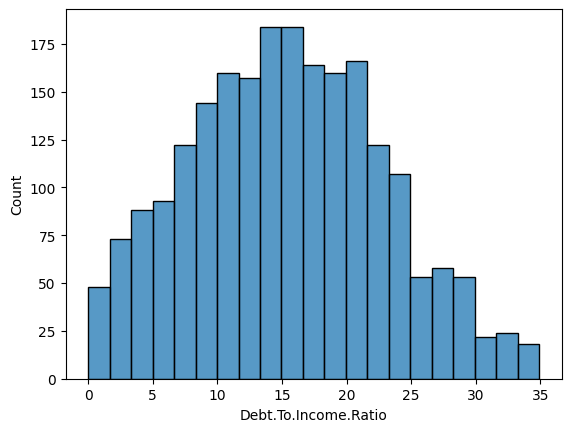

In [34]:
sns.histplot(df_trf['Debt.To.Income.Ratio'])

In [35]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [36]:
def binning(df, col, bin_no, method):
  kbin_col = KBinsDiscretizer(n_bins=bin_no, encode='ordinal', strategy=method)

  col_reshaped = col.values.reshape(-1, 1)
  col_transformed = kbin_col.fit_transform(col_reshaped)

  df[f'{col.name}_binned'] = col_transformed.flatten()

  plt.figure(figsize=(10,4))

  plt.subplot(121)
  plt.hist(col, color='Red')
  plt.title("before binning")

  plt.subplot(122)
  plt.hist(col, color='Green')
  plt.title("after binning")

  plt.show()

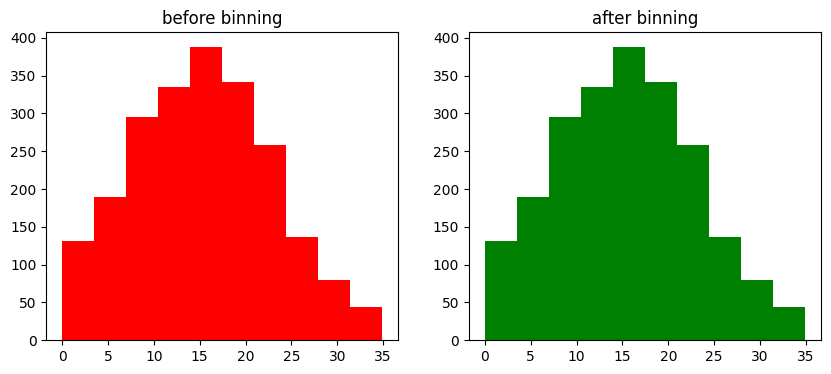

In [37]:
binning(df_trf, df_trf['Debt.To.Income.Ratio'], 10, 'quantile')

### **7.2** Observation

In [38]:
df_trf

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Purpose,Debt.To.Income.Ratio,State,Monthly.Income,FICO.Range,Open.CREDIT.Lines,...,Inquiries.in.the.Last.6.Months,Employment.Length,Loan.Length_36 months,Loan.Length_60 months,Home.Ownership_MORTGAGE,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT,Debt.To.Income.Ratio_binned
0,79542.0,25000.0,25000.00,18.49,debt_consolidation,27.56,VA,8606.56,720-724,11.0,...,3.0,5 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0,9.0
1,75473.0,19750.0,19750.00,17.27,debt_consolidation,13.39,NY,6737.50,710-714,14.0,...,3.0,4 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
2,67265.0,2100.0,2100.00,14.33,major_purchase,3.50,LA,1000.00,690-694,13.0,...,1.0,< 1 year,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,80167.0,28000.0,28000.00,16.29,credit_card,19.62,NV,7083.33,710-714,12.0,...,1.0,10+ years,1.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
4,17240.0,24250.0,17431.82,12.23,credit_card,23.79,OH,5833.33,730-734,6.0,...,2.0,10+ years,0.0,1.0,1.0,0.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000.0,30000.00,23.28,other,12.10,IL,7083.33,675-679,16.0,...,1.0,10+ years,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0
2196,63768.0,4200.0,4200.00,14.33,car,14.16,NJ,3850.00,700-704,4.0,...,0.0,2 years,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0
2197,94545.0,19800.0,19775.00,15.31,debt_consolidation,15.03,IL,6666.67,675-679,10.0,...,3.0,6 years,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0
2198,53635.0,18000.0,18000.00,20.99,credit_card,11.63,CA,9051.83,670-674,5.0,...,2.0,4 years,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0


# **8.0** Outlier Detection and Removal

### **8.1** Compute mean, mode, median and Inter-Quartile Range (IQR)

In [39]:
numerical_col_list

['ID',
 'Amount.Requested',
 'Amount.Funded.By.Investors',
 'Interest.Rate',
 'Debt.To.Income.Ratio',
 'Monthly.Income',
 'Open.CREDIT.Lines',
 'Revolving.CREDIT.Balance',
 'Inquiries.in.the.Last.6.Months']

In [40]:
for col in numerical_col_list:
  mean_val = df_trf[col].mean()
  mode_val = df_trf[col].mode()
  median_val = df_trf[col].median()
  q75, q25 = np.percentile(df[col].dropna(), [75 ,25])
  IQR_val =  q75-q25

  print(f'Column name: {col}')
  print(f'Mean: {mean_val:.2f}')
  print(f'Mode: {mode_val.to_list() if len(mode_val) > 1 else mode_val.iloc[0]}')
  print(f'Meidan: {median_val}')
  print(f'IQR: {IQR_val}\n')

Column name: ID
Mean: 52037.00
Mode: 80071.0
Meidan: 51314.0
IQR: 52037.25

Column name: Amount.Requested
Mean: 12488.12
Mode: 10000.0
Meidan: 10000.0
IQR: 11000.0

Column name: Amount.Funded.By.Investors
Mean: 12069.59
Mode: 10000.0
Meidan: 10000.0
IQR: 10218.75

Column name: Interest.Rate
Mean: 13.05
Mode: 12.12
Meidan: 13.11
IQR: 5.640000000000001

Column name: Debt.To.Income.Ratio
Mean: 15.37
Mode: 0.0
Meidan: 15.225000000000001
IQR: 10.945

Column name: Monthly.Income
Mean: 5725.59
Mode: 5000.0
Meidan: 5000.0
IQR: 3419.0825000000004

Column name: Open.CREDIT.Lines
Mean: 10.08
Mode: 8.0
Meidan: 9.0
IQR: 6.0

Column name: Revolving.CREDIT.Balance
Mean: 15331.50
Mode: 0.0
Meidan: 11007.0
IQR: 13238.5

Column name: Inquiries.in.the.Last.6.Months
Mean: 0.90
Mode: 0.0
Meidan: 0.0
IQR: 1.0



### **8.2** Outlier detection: distribution plot

In [41]:
numerical_col_list = [
'Amount.Requested',
 'Amount.Funded.By.Investors',
 'Interest.Rate',
 'Debt.To.Income.Ratio',
 'Monthly.Income',
 'Open.CREDIT.Lines',
 'Revolving.CREDIT.Balance',
 'Inquiries.in.the.Last.6.Months']

In [42]:
def generate_distplot(df, numerical_col_list, cols_per_row):
  num_cols = len(numerical_col_list)
  num_rows = (num_cols + cols_per_row - 1)

  plt.figure(figsize=(10 * cols_per_row, 4 * num_rows))

  for i, col in enumerate(numerical_col_list):
    plt.subplot(num_cols, cols_per_row, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Dist plot of {col}')

  plt.tight_layout()
  plt.show()

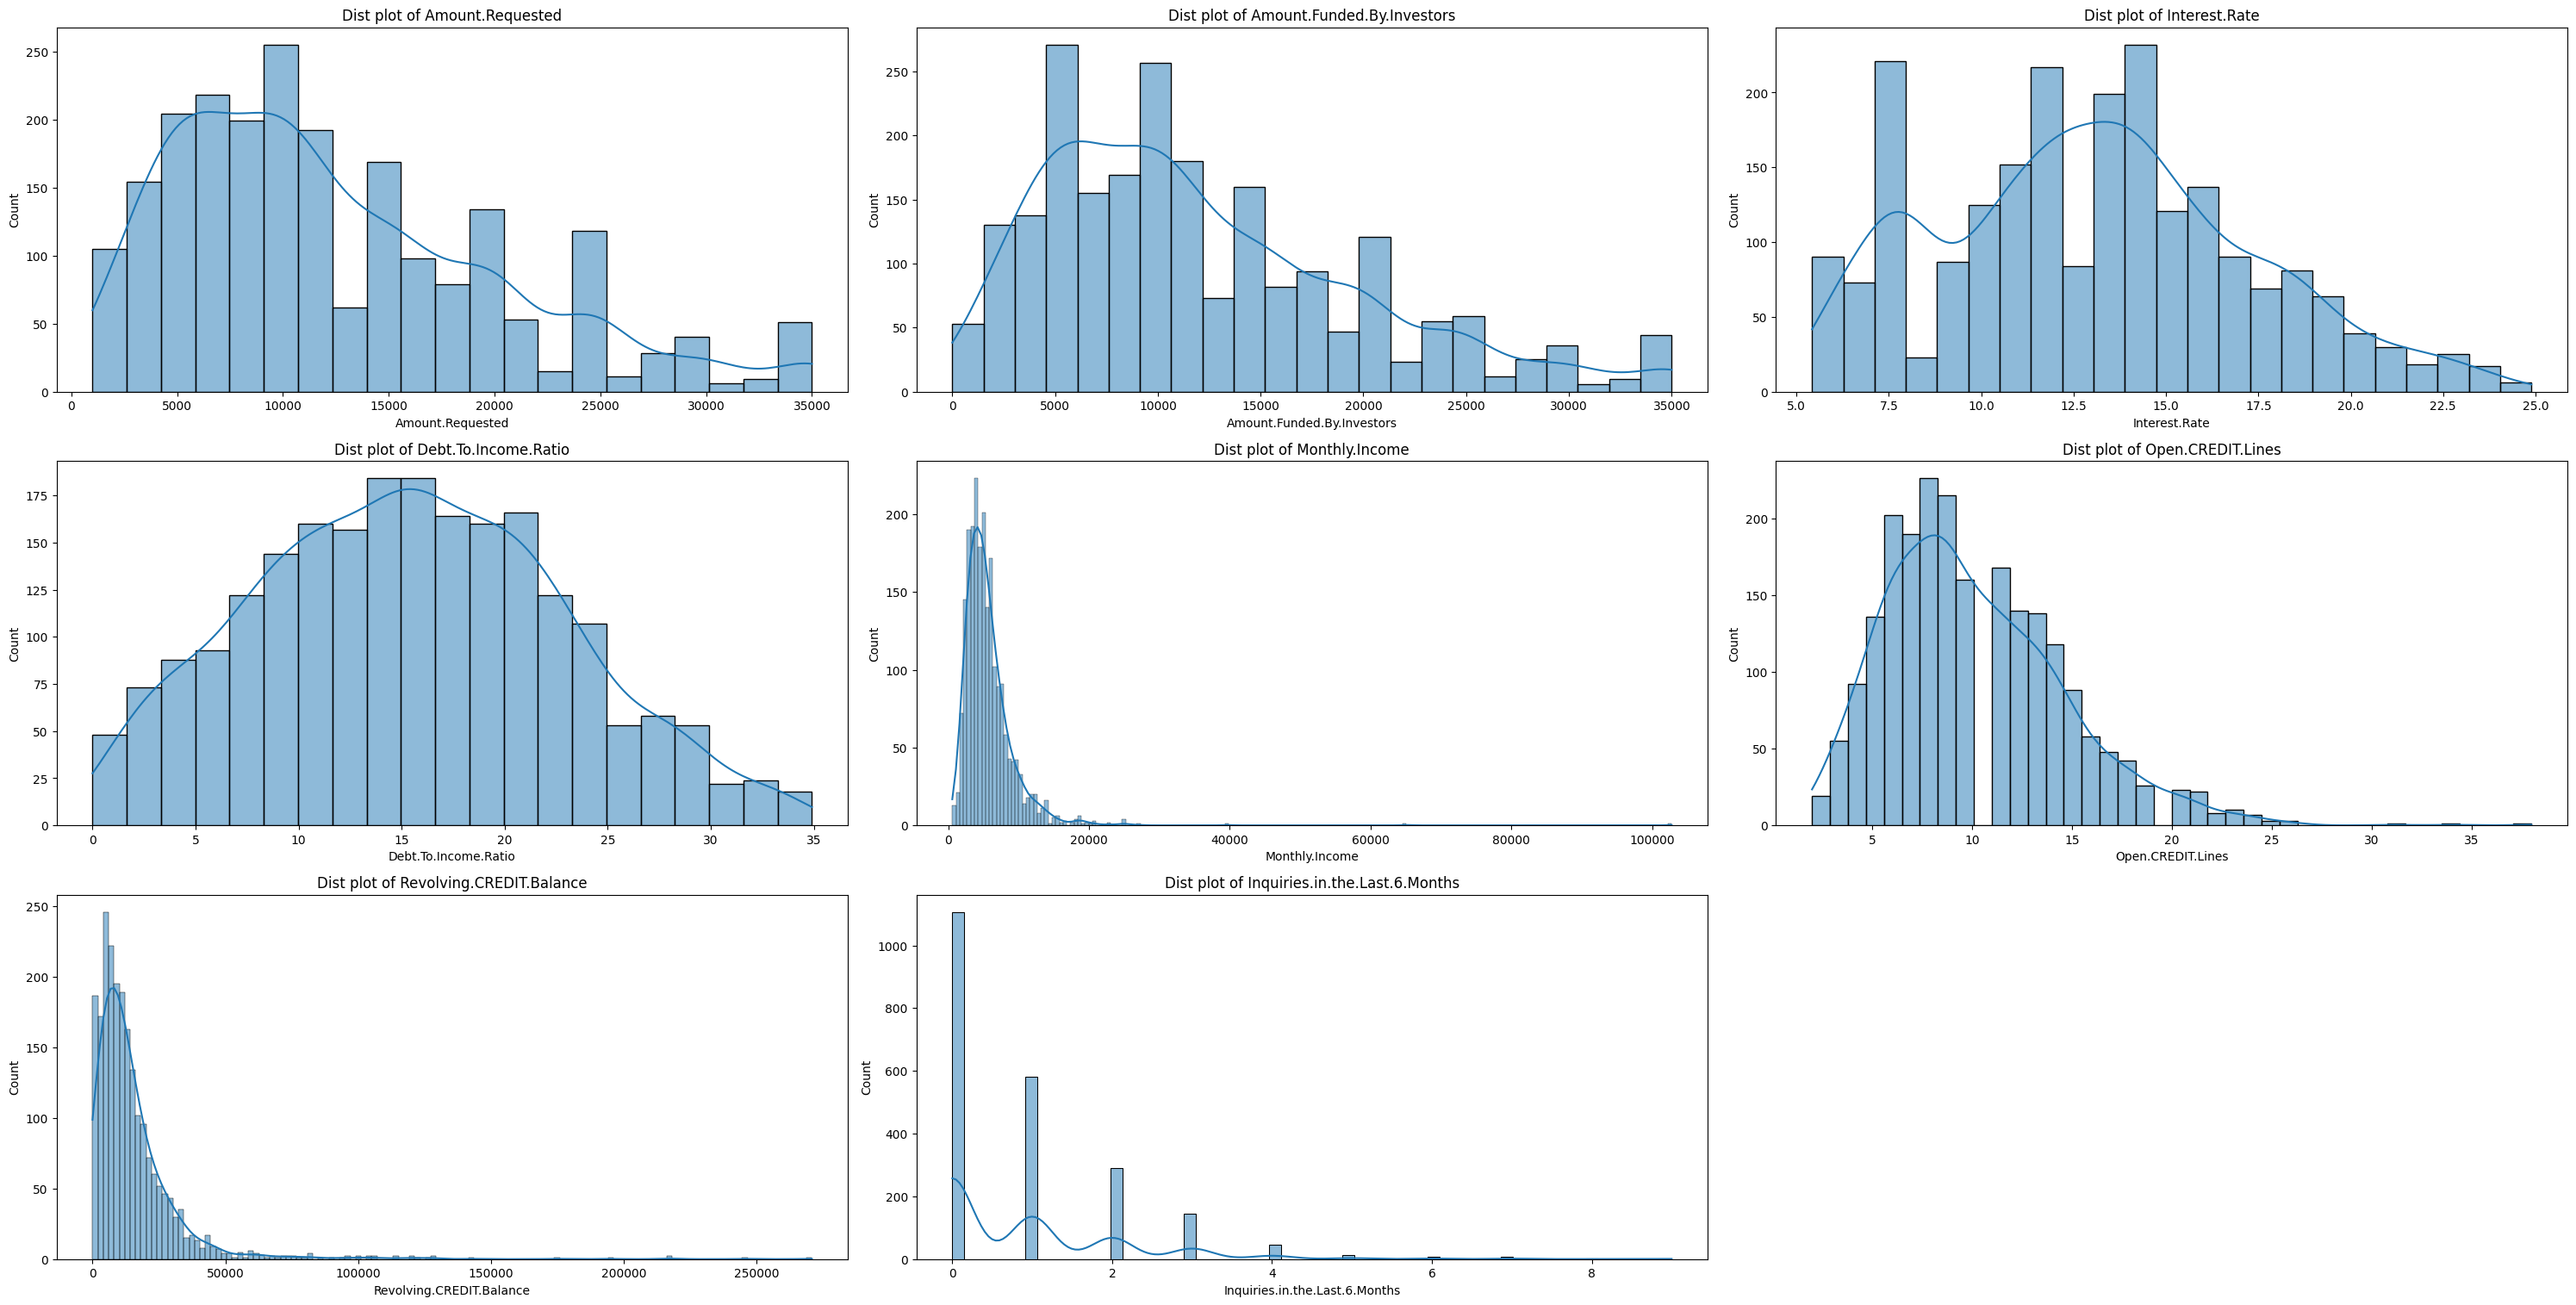

In [43]:
generate_distplot(df_trf, numerical_col_list, 3)

### **8.3** Outlier removal method: Capping

**8.3.1** Boxplot of Amount Funded by Investors before Capping

Text(0.5, 1.0, 'Box plot of Amount.Funded.By.Investors before outlier capping')

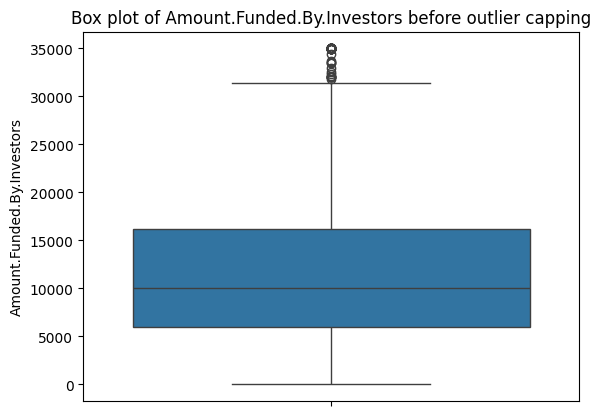

In [44]:
i=1
sns.boxplot(df_trf[numerical_col_list[i]])
plt.title(f"Box plot of {numerical_col_list[i]} before outlier capping")

**8.3.2** IQR and Range of Amount Funded by Investors

In [45]:
q3 = df_trf[numerical_col_list[i]].quantile(0.75)
q1 = df_trf[numerical_col_list[i]].quantile(0.25)
iqr = (q3-q1)
upper_range = q3 + (1.5*iqr)
lower_range = q1 - (1.5*iqr)
print(f"Highest amount funded by investors: ", upper_range)
print(f"Lowest amount funded by investors: ", lower_range)

Highest amount funded by investors:  31546.875
Lowest amount funded by investors:  -9328.125


**8.3.3** Finding the outliers

In [46]:
df_trf[(df_trf[numerical_col_list[i]] > upper_range) | (df_trf[numerical_col_list[i]] < lower_range)].shape[0]

55

In [47]:
df_capped = df_trf.copy()

df_capped[numerical_col_list[i]] = np.where(
    df_capped[numerical_col_list[i]] > upper_range,
    upper_range,
    np.where(
        df_capped[numerical_col_list[i]] < lower_range,
        lower_range,
        df_capped[numerical_col_list[i]]
    )
)

**8.3.4** Boxplot of Amount Funded by Investors after Capping

Text(0.5, 1.0, 'Box plot of Amount.Funded.By.Investors after outlier capping')

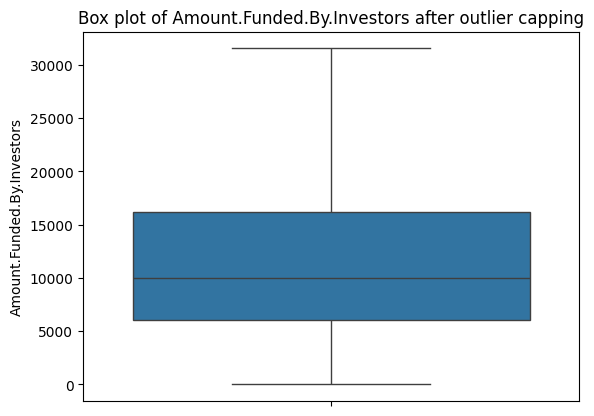

In [48]:
i=1
sns.boxplot(df_capped[numerical_col_list[i]])
plt.title(f"Box plot of {numerical_col_list[i]} after outlier capping")

### **8.4** Observation

We can see an significant change in the box plot before and after performing Capping operation. The 55 outliers outside the IQR (Inter-quartile range) are now removed, without impacting the data distribution.

# **9.0** Business Decision Making: Visualization

### **9.1** Highest and least loan application received based on state

In [49]:
def max_min_val_plot(df, col):
  max_value = df[col].value_counts().head(1)
  min_value = df[col].value_counts().tail(1)

  df_plot = pd.concat([max_value, min_value])

  plt.figure(figsize=(10,4))

  sns.barplot()

  barplot = plt.bar(df_plot.index, df_plot.values)
  plt.bar_label(barplot, labels=df_plot.values, label_type='edge')
  plt.title(f"Highest and Lowest number of {col}")

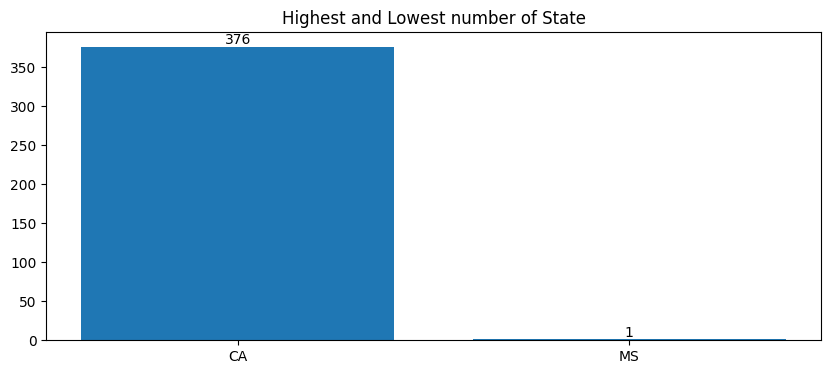

In [50]:
max_min_val_plot(df, 'State')

### **9.2** Data distribution of loan purpose

<Axes: ylabel='count'>

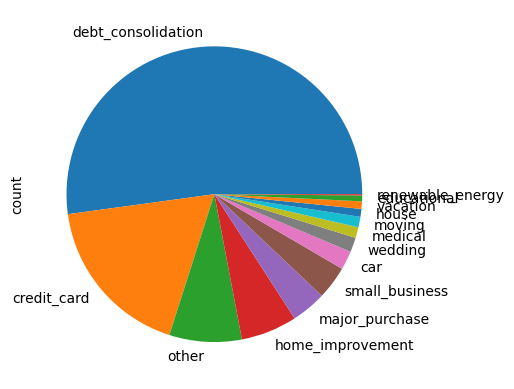

In [51]:
df_capped['Loan.Purpose'].value_counts().plot(kind='pie')

### **9.3** Data distribution of requested loan amount

Text(0.5, 1.0, 'Loan amount requested')

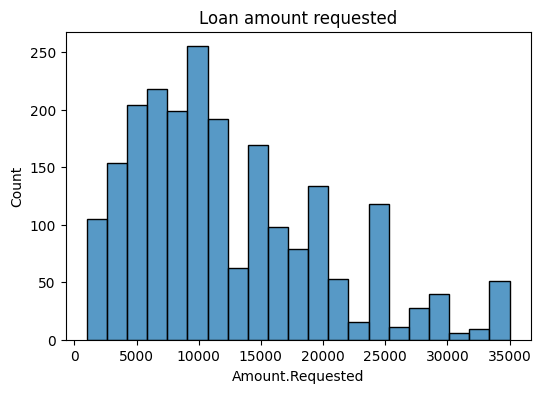

In [52]:
plt.figure(figsize=(6,4))

sns.histplot(df['Amount.Requested'])
plt.title("Loan amount requested")

### **9.4** Relation between Loan interest rate, Debt to income ratio and loan duration

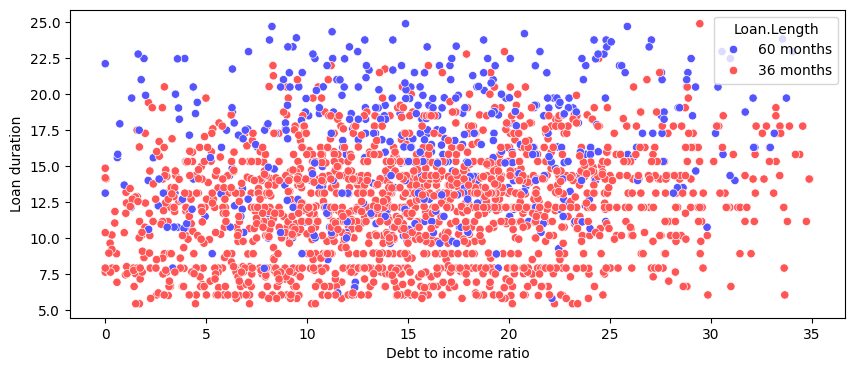

In [53]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=df_capped['Debt.To.Income.Ratio'], y=df_capped['Interest.Rate'], hue=df['Loan.Length'],legend=True, palette='seismic')
plt.xlabel('Debt to income ratio')
plt.ylabel('Loan duration')
plt.show()

### **9.5** Observation

We can clearly see a interesting relationship between the loan interest rate, debt to income ration and the loan length obtained by those applicants:

*   Applicants with low loan interest rate possess low debt-to-income ratio usually opt for loan duration of 3 yrs. or 36 months
*   On the other hand, applicants with high loan interest rate has high debt-to-income ratio usually has to go for for loan duration of 5 yrs. or 60 months

with some overlapping between the two clusters.


# **10.0** Hypothesis Testing

### **10.1** Problem statement

Suppose an US based insurance service provider claims that the loan interest amount a customer from the state of California has to pay on an average is 10% per annum with a standard deviation of 5%. The organization collects a random sample of 50 customers from this state and finds their loan interest rate. They find the sample has an average loan interest rate of 12.5% and standard deviation of 4%.

*   What will be the Null and Alternate hypothesis?
*   Is the Null hypothesis is accepted or not?



In [54]:
print("""
Null Hypothesis (H0): μ = 10
Alternate Hypothesis (H1): μ > 10 (Considering the average loan interest rate is higher than 10%, hence it will be validated with one tailed test )

Population Standard Deviation (σ) = 5
Critical value (α) = 5% (take 5% if not given in question)
Sample mean (x̄) = 12.5
Sample size (N) = 50
Sample Standard deviation (s) = 4

here, n >= 30 hence will go with z-test

Step 1: Calculate z using z-test formula as below:
z = (x̄ - μ) / (σ/√n)

Step 2: Derive z critical value from z table for α = 5%
z critical values = (-1.96, +1.96) to accept the claim (significantly),
calculated z should be in between -1.96 < z < +1.96
""")


Null Hypothesis (H0): μ = 10
Alternate Hypothesis (H1): μ > 10 (Considering the average loan interest rate is higher than 10%, hence it will be validated with one tailed test )

Population Standard Deviation (σ) = 5
Critical value (α) = 5% (take 5% if not given in question)
Sample mean (x̄) = 12.5
Sample size (N) = 50
Sample Standard deviation (s) = 4

here, n >= 30 hence will go with z-test

Step 1: Calculate z using z-test formula as below:
z = (x̄ - μ) / (σ/√n)

Step 2: Derive z critical value from z table for α = 5%
z critical values = (-1.96, +1.96) to accept the claim (significantly),
calculated z should be in between -1.96 < z < +1.96



In [55]:
Z = (12.5-10)//(5/np.sqrt(50))
print(f'The Z-score obtained is: {Z}')

The Z-score obtained is: 3.0


The Z-score of 3.0 is outside the critical values of one tailed p-test values of aplha significance level of 0.05 with Z-score between -1.96 to +1.96.

Here, the p-value << 0.05. Therefore, we reject the Null Hypothesis.

Hence, we can say that we do not have enough evidence to support the initial
 claim that the loan interest amount a customer from the state of California has to pay on an average is 10% per annum

### **10.2** Validation

Now if we can check against our actual dataset, we can indeed observe the average loan interest amount for the customers from California (CA) is close to 13% with a standard deviation of 3.90%.

In [56]:
df_hypotest = df_capped.copy()
df_ca = df_hypotest[df_hypotest['State']=='CA']
mean_CA_IR = df_ca['Interest.Rate'].mean()
std_CA_IR = df_ca['Interest.Rate'].std()

print(f'Average loan interest rate of California: {mean_CA_IR:.2f}')
print(f'Standard deviation of loan interest rate of California: {std_CA_IR:.2f}')

Average loan interest rate of California: 13.00
Standard deviation of loan interest rate of California: 3.90


# Reference

The dataset used to prepare this notebook is sourced from an online dataset on [Kaggle](https://www.kaggle.com/code/dhivyasekar/eda-visualization-and-hypothesis-testing/notebook).